<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction


**What?** SARIMA vs. SARIMAX



# SARIMA - motivation


- The problem with plain ARIMA model is it does not support seasonality.
- If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing. 



# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import pmdarima as pm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose

/opt/anaconda3/envs/trainingAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/trainingAI/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Import dataset


- **a10** is a drug sales dataset.



In [2]:
data = pd.read_csv('./a10.csv', parse_dates=['date'], index_col='date')

In [3]:
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


# Normal vs. seasonal differencing


- The seasonal spikes are still there after applying usual differencing (lag 1). 
- Whereas, they are much more dampled after seasonal differencing.



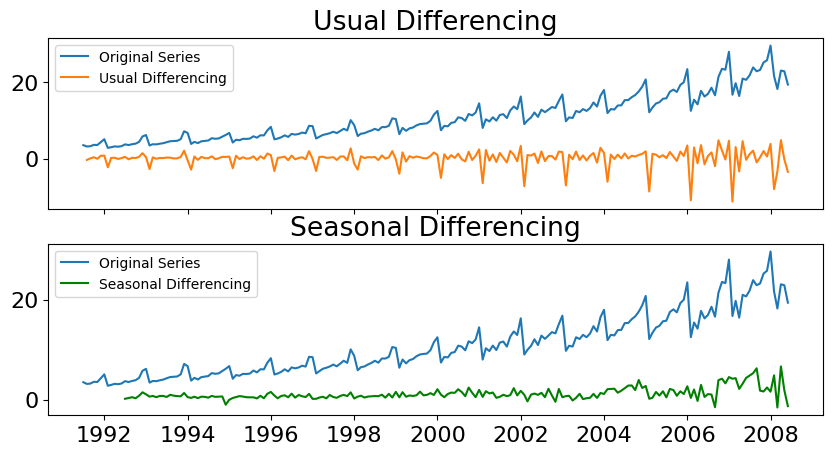

In [4]:
rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 16

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

axes[0].plot(data[:], label='Original Series')
# Usual differencing
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)



axes[1].plot(data[:], label='Original Series')
# Seasonal differencing
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

# SARIMA modelling


- To do that, you need to set seasonal=True.
- Set the frequency m=12 for month wise series 
- Enforce D=1.  



In [5]:
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.81 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.68 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.573, Time=2.59 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.17 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.62 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.19 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

In [6]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.953
Date:                            Sat, 04 Feb 2023   AIC                            523.905
Time:                                    09:39:30   BIC                            549.965
Sample:                                07-01-1991   HQIC                           534.460
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.009      0.586      0.558      -0.012       0.023
ar.L1          0.9766      0.018     53.222      0.000       0.941       1.013
ma.L1         -0.9124      0.056    -16.186      0.000      -1.023      -0.802
ma.L2          0.2158      0.059      3.672      0.000       0.101       0.331
ar.S.L12       0.8419      0.154      5.468      0.000       0.540       1.144
ma.S.L12      -1.5851      0.175     -9.056      0.000      -1.928      -1.242
ma.S.L24       0.7683      0.111      6.950      0.000       0.552       0.985
sigma2         0.7460      0.066     11.338      0.000       0.617       0.875
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               142.02
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast


- Best model:  ARIMA(1,0,2)(1,1,2)
- Let’s forecast for the next 24 months. 



In [7]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')


In [8]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

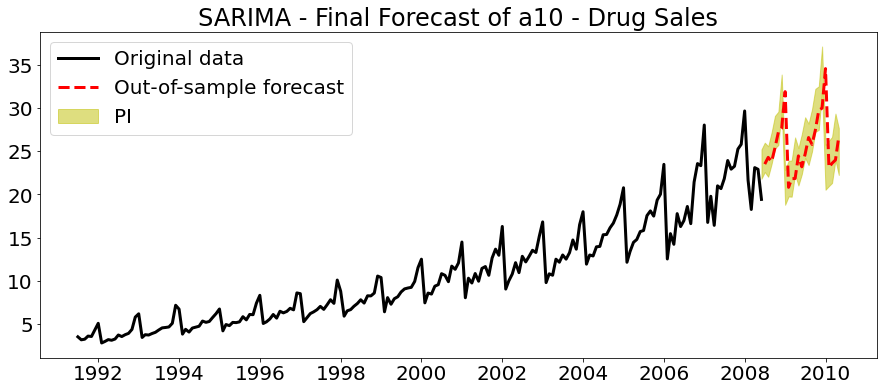

In [9]:
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 20

plt.plot(data, "k-", lw = 3, label = "Original data")
plt.plot(fitted_series, "r--", lw = 3, label = "Out-of-sample forecast") 
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color = 'y', alpha=.5, label = "PI")

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.legend()
plt.show()

# SARIMAX Model with exogenous variable


- SARIMAX allows you to add an external predictor also called **exogenous**.
- We are going to use to use the seasonal index from the classical seasonal decomposition on the latest 36 months of data.
- Isn’t SARIMA already modeling the seasonality, you ask? Yes, but I want to see how the model looks if we force the recent seasonality pattern into the training and forecast.



In [10]:
# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

In [11]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [12]:
# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [13]:
df

,value,month,seasonal_index
date,,,
1991-07-01,3.526591,7,0.970490
1991-08-01,3.180891,8,1.050900
1991-09-01,3.252221,9,0.998881
1991-10-01,3.611003,10,1.059657
1991-11-01,3.565869,11,1.146141
...,...,...,...
2008-02-01,21.654285,2,0.803279
2008-03-01,18.264945,3,0.850667
2008-04-01,23.107677,4,0.832227


In [14]:
# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.87 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.65 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.573, Time=2.51 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.17 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.63 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.19 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

In [15]:
sxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.953
Date:                            Sat, 04 Feb 2023   AIC                            523.905
Time:                                    09:40:27   BIC                            549.965
Sample:                                07-01-1991   HQIC                           534.460
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.009      0.586      0.558      -0.012       0.023
ar.L1          0.9766      0.018     53.222      0.000       0.941       1.013
ma.L1         -0.9124      0.056    -16.186      0.000      -1.023      -0.802
ma.L2          0.2158      0.059      3.672      0.000       0.101       0.331
ar.S.L12       0.8419      0.154      5.468      0.000       0.540       1.144
ma.S.L12      -1.5851      0.175     -9.056      0.000      -1.928      -1.242
ma.S.L24       0.7683      0.111      6.950      0.000       0.552       0.985
sigma2         0.7460      0.066     11.338      0.000       0.617       0.875
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               142.02
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


- The coefficient is very small for x1, so the contribution from that variable will be negligible. Let’s forecast it anyway.
- We have effectively forced the latest seasonal effect of the latest 3 years into the model instead of the entire history.
- Let’s forecast into the next 24 months.



In [16]:
df["seasonal_index"].values

array([0.97049014, 1.05089992, 0.99888107, 1.05965713, 1.14614116,
       1.15075029, 1.31691266, 0.80327935, 0.85066678, 0.83222688,
       0.95475059, 0.86534404, 0.97049014, 1.05089992, 0.99888107,
       1.05965713, 1.14614116, 1.15075029, 1.31691266, 0.80327935,
       0.85066678, 0.83222688, 0.95475059, 0.86534404, 0.97049014,
       1.05089992, 0.99888107, 1.05965713, 1.14614116, 1.15075029,
       1.31691266, 0.80327935, 0.85066678, 0.83222688, 0.95475059,
       0.86534404, 0.97049014, 1.05089992, 0.99888107, 1.05965713,
       1.14614116, 1.15075029, 1.31691266, 0.80327935, 0.85066678,
       0.83222688, 0.95475059, 0.86534404, 0.97049014, 1.05089992,
       0.99888107, 1.05965713, 1.14614116, 1.15075029, 1.31691266,
       0.80327935, 0.85066678, 0.83222688, 0.95475059, 0.86534404,
       0.97049014, 1.05089992, 0.99888107, 1.05965713, 1.14614116,
       1.15075029, 1.31691266, 0.80327935, 0.85066678, 0.83222688,
       0.95475059, 0.86534404, 0.97049014, 1.05089992, 0.99888

In [17]:
seasonal_index

,seasonal,month
date,,
2007-07-01,0.970490,7
2007-08-01,1.050900,8
2007-09-01,0.998881,9
2007-10-01,1.059657,10
2007-11-01,1.146141,11
2007-12-01,1.150750,12
2008-01-01,1.316913,1
2008-02-01,0.803279,2
2008-03-01,0.850667,3


In [18]:
print(n_periods)
print(seasonal_index.values.shape)
print((seasonal_index.values.reshape(-1,1).shape))
print(np.tile(seasonal_index.values, 2).reshape(-1,1).shape)

24
(12, 2)
(24, 1)
(48, 1)


In [19]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.values, 1).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')


In [21]:
fitted_series

2008-06-01          NaN
2008-07-01    23.517096
2008-08-01    24.295112
2008-09-01    23.814732
2008-10-01    25.385912
2008-11-01    27.218869
2008-12-01    27.660589
2009-01-01    31.904332
2009-02-01    20.826320
2009-03-01    21.827733
2009-04-01    21.845531
2009-05-01    24.467592
2009-06-01    23.202180
2009-07-01    24.681506
2009-08-01    26.591050
2009-09-01    25.797691
2009-10-01    27.427185
2009-11-01    29.741106
2009-12-01    29.994034
2010-01-01    34.569844
2010-02-01    23.143976
2010-03-01    23.604191
2010-04-01    23.991455
2010-05-01    26.670298
Freq: MS, dtype: float64

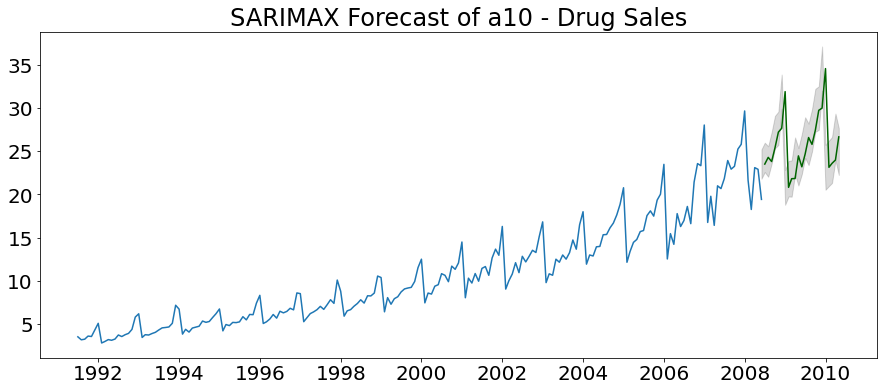

In [20]:
# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

# References


- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
- [Download dataset](https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)
- https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

